## Political Advertisements from Facebook
## This database contains ads that ran on Facebook and were submitted by of users
### Author : Manjusha Thottiparambil Ravindran

### About Facebooks Political/Not Political Ads Dataset
<p>https://www.propublica.org/datastore/dataset/political-advertisements-from-facebook</p>

<p>This database contains ads that ran on Facebook and were submitted by thousands of users from around the world. ProPublica, the Globe and Mail, and Quartz asked readers to install browser extensions that automatically collected advertisements on their Facebook pages and sent them to our servers. We then used a machine learning classifier to identify which ads were likely political and included them in this dataset. The included fields are:</p>
id: post id number on facebook<br />
html: HTML of the ad as collected by the Political Ad Collector<br />
political: number of Political Ad Collector users who have voted that the ad is political<br />
not_political: number of Political Ad Collector users who have voted that the ad is not political<br />
title: ad title<br />
message: ad content<br />
thumbnail: link for a thumbnail of the profile image (of the advertiser)<br />
created_at: date ad was first collected by the Political Ad Collector<br />
updated_at: the most recent time that it got an impression OR the most recent time it was voted on<br />
lang: language of the ad. always en-US.<br />
images: link for images included in the ad<br />
impressions: number of times the ad has been seen by the Political Ad Collector<br />
political_probability: calculated by the classifier. data only includes ads with a probability >=0.7<br />
targeting: Facebook’s “Why am I seeing this?” disclosure provided to Political Ad Collector users<br />
suppressed: value is false. suppressed ads are excluded from this data set because they were misclassified.<br />
targets: a parsed version of targeting<br />
advertiser: the account that posted the ad<br />
entities: named entities mentioned in the ad, extracted using software<br />
page: the page that posted the ad<br />
lower_page: the Facebook URL of the advertiser that posted the ad (the “page” column, lowercased)<br />
targetings: an array of one or more of Facebook’s “Why am I seeing this?” disclosures provided to Political Ad Collector users<br />
paid_for_by: for political ads, the entity listed in Facebook’s required disclosure as having paid for the ad<br />
targetedness: an internal metric for estimating how granularly an ad is targeted, used for sorting in the <br />ProPublica search interface<br />


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dffbadv=pd.read_csv('Data/fbpac-ads-en-US.csv/fbpac-ads-en-US.csv')

In [ ]:
dffbadv.head(5)


,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


In [ ]:
dffbadv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [ ]:
dffbadv.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              object
message                            object
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        object
targetedness                      float64
listbuilding_fundraising_proba    

In [ ]:
dffbadv.isnull().sum()

id                                    0
html                                  0
political                             0
not_political                         0
title                                18
message                               0
thumbnail                             0
created_at                            0
updated_at                            0
lang                                  0
images                                0
impressions                           0
political_probability                 0
targeting                         46258
suppressed                            0
targets                            4207
advertiser                        37711
entities                           3666
page                               2560
lower_page                         2560
targetings                        48262
paid_for_by                       50279
targetedness                      49577
listbuilding_fundraising_proba     9930
dtype: int64

In [ ]:
dffbadv.describe().T

,count,mean,std,min,25%,50%,75%,max
political,162324.0,4.177663,10.574403,0.000000,0.000000,1.000000,4.000000,488.000000
not_political,162324.0,0.794214,2.770883,0.000000,0.000000,0.000000,1.000000,330.000000
impressions,162324.0,4.605049,40.689815,0.000000,1.000000,1.000000,2.000000,3575.000000
political_probability,162324.0,0.928099,0.169513,0.000079,0.951812,0.997825,0.999978,1.000000
targetedness,112747.0,3.939723,1.758957,0.000000,3.000000,4.000000,4.000000,12.000000
listbuilding_fundraising_proba,152394.0,0.545964,0.333821,0.000091,0.265190,0.423612,0.999893,1.230622


<AxesSubplot: >

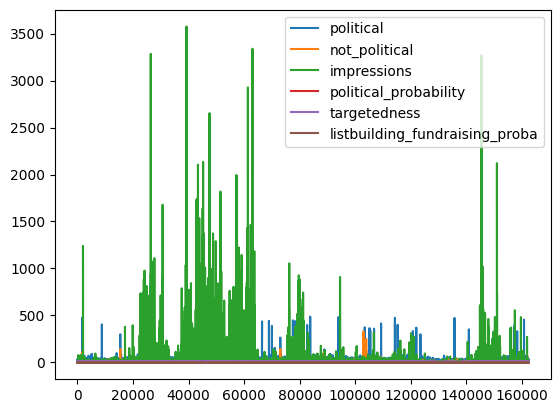

In [ ]:
dffbadv.plot()

<AxesSubplot: ylabel='Density'>

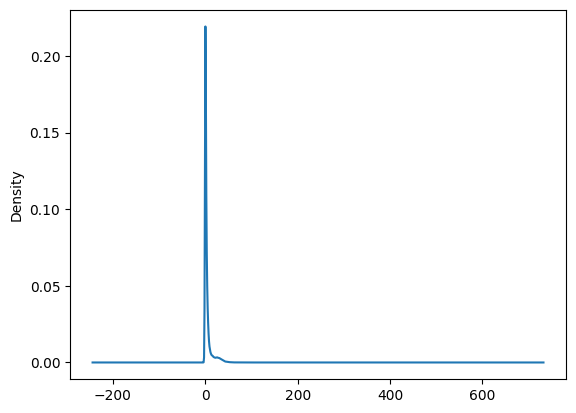

In [ ]:
# plot distribution of values in political column
dffbadv['political'].plot(kind='kde')


In [ ]:
# plot distribution of values in non political column
dffbadv['not_political'].plot(kind='kde')

In [ ]:
dffbadv.corr()

C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8740\1189670841.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dffbadv.corr()


,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
political,1.000000,0.267615,-0.004525,0.113638,0.049682,-0.099580
not_political,0.267615,1.000000,0.008487,-0.013219,-0.040422,0.018845
impressions,-0.004525,0.008487,1.000000,0.009100,-0.015223,0.011552
political_probability,0.113638,-0.013219,0.009100,1.000000,0.016359,0.050328
targetedness,0.049682,-0.040422,-0.015223,0.016359,1.000000,-0.205439
listbuilding_fundraising_proba,-0.099580,0.018845,0.011552,0.050328,-0.205439,1.000000


C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8740\3222159891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dffbadv.corr(),annot=True,cmap="coolwarm")


<AxesSubplot: >

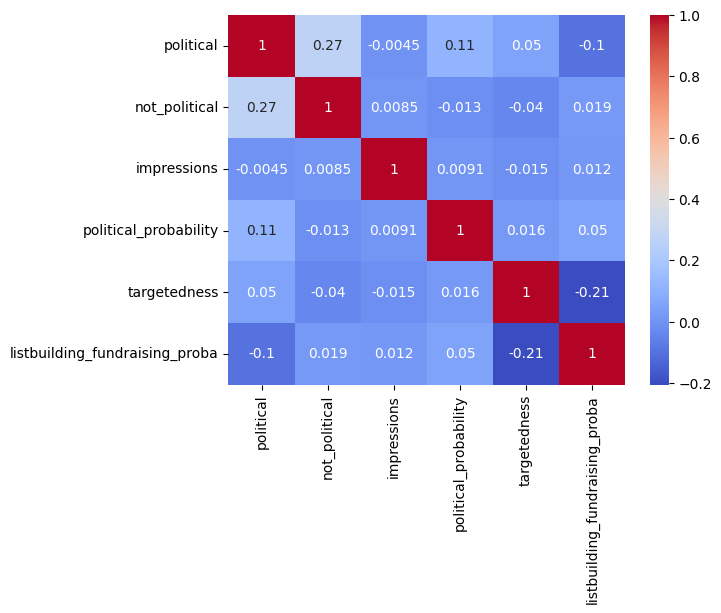

In [ ]:
sns.heatmap(dffbadv.corr(),annot=True,cmap="coolwarm")

There is no significant correlation between the variables

In [ ]:
dffbadv.tail(10)

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
162314,23842961560010553,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Unite America,<p>Both parties care more about scoring cheap ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-08-08 02:56:26.333759+00,2018-08-08 02:56:26.333759+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",Unite America,[],https://www.facebook.com/UniteAmerica/,https://www.facebook.com/uniteamerica/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Unite America Inc.,4.0,0.292497
162315,23842649872210034,"<div class=""_5pcr userContentWrapper""><div cla...",4,1,Surly Feminists for the Revolution,<p>Are you looking for a sanctuary from negati...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-07-07 03:04:50.554265+00,2018-07-08 00:03:50.593295+00,en-US,...,f,[],Surly Feminists for the Revolution,[],https://www.facebook.com/Surly-Feminists-for-t...,https://www.facebook.com/surly-feminists-for-t...,NaN,NaN,NaN,0.258418
162316,23842960657030239,"<div class=""_5pcr userContentWrapper""><div cla...",11,1,Ammar Campa for Congress,<p>Duncan Hunter just launched disturbing and ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-02 11:56:21.969601+00,2018-10-26 04:36:11.913551+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""30 and older""},...",Ammar Campa for Congress,"[{""entity"": ""Duncan Hunter"", ""entity_type"": ""P...",https://www.facebook.com/CampaNajjar/,https://www.facebook.com/campanajjar/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Ammar Campa-Najjar for Congress.,5.0,0.840632
162317,23843037301150450,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Tish James,<p>I've fought for the most vulnerable among u...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-11-04 12:47:19.479158+00,2018-11-04 12:47:19.479158+00,en-US,...,f,"[{""target"": ""Interest"", ""segment"": ""Andrew Cuo...",Tish James,[],https://www.facebook.com/TishJamesforAG/,https://www.facebook.com/tishjamesforag/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",James for NY,7.0,0.332728
162318,23842850938820544,"<div class=""_5pcr userContentWrapper""><div cla...",1,1,International Rescue Committee,"<p>Every day, 35,000 people are forced to flee...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-06-20 19:25:30.560252+00,2018-06-21 15:30:39.888872+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",International Rescue Committee,[],https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",NaN,1.0,0.999928
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [ ]:
subset=['title','message','impressions','targets','advertiser','page','paid_for_by','political','not_political']

In [ ]:
dfsubset=dffbadv[subset]

In [ ]:
dfsubset.to_csv('fbads.csv')

In [ ]:
dfsubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          162306 non-null  object
 1   message        162324 non-null  object
 2   impressions    162324 non-null  int64 
 3   targets        158117 non-null  object
 4   advertiser     124613 non-null  object
 5   page           159764 non-null  object
 6   paid_for_by    112045 non-null  object
 7   political      162324 non-null  int64 
 8   not_political  162324 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 11.1+ MB


In [ ]:
dfsubset.isna().sum()

title               18
message              0
impressions          0
targets           4207
advertiser       37711
page              2560
paid_for_by      50279
political            0
not_political        0
dtype: int64

In [ ]:
dfsubset.isnull().sum()

title               18
message              0
impressions          0
targets           4207
advertiser       37711
page              2560
paid_for_by      50279
political            0
not_political        0
dtype: int64

In [ ]:
dfsubset=dfsubset.dropna(subset=['title'])

In [ ]:
dfsubset.shape

(162306, 9)

In [ ]:
dfsubset.head(5)

,title,message,impressions,targets,advertiser,page,paid_for_by,political,not_political
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,1,[],NaN,https://www.facebook.com/LCVoters/,League of Conservation Voters,0,0
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,1,[],NaN,https://www.facebook.com/indivisibleguide/,Indivisible Project,0,0
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,1,[],NaN,https://www.facebook.com/InternationalRescueCo...,International Rescue Committee,0,0
3,Covenant House International,<p>What more can you do in the final hours of ...,1,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,https://www.facebook.com/CovenantHouse/,Covenant House International,0,0
4,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",1,[],NaN,https://www.facebook.com/PlannedParenthood/,Planned Parenthood Federation of America,0,1


array([<AxesSubplot: title={'center': 'impressions'}>,
       <AxesSubplot: title={'center': 'political'}>,
       <AxesSubplot: title={'center': 'not_political'}>], dtype=object)

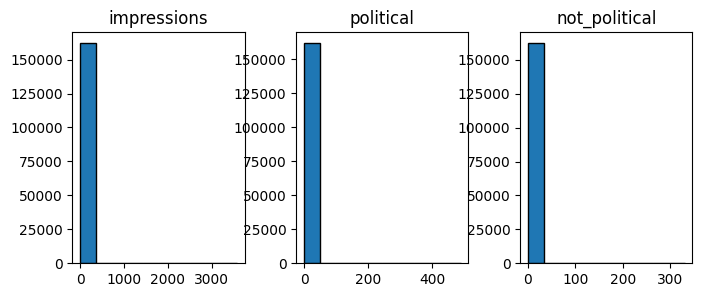

In [ ]:
#define format for subplots
fig, axis = plt.subplots(1, 3, figsize=(8,3))

#create histogram for each column in DataFrame
dfsubset.hist(ax=axis, edgecolor='black', grid=False)

In [ ]:
dfsubset['advertiser'].value_counts()

Beto O'Rourke                              2064
ACLU                                       1577
International Rescue Committee             1476
Donald J. Trump                            1443
Planned Parenthood Action                  1230
                                           ... 
Morris County New Voices                      1
Meshon Rawls for Alachua County Judge         1
Tom Keliinoi for San Diego School Board       1
Kate Albright-Hanna for State Rep             1
Surly Feminists for the Revolution            1
Name: advertiser, Length: 12068, dtype: int64

### Research Question 1 : Who were the top 10 political advertisers?

In [ ]:

toptenpoliticaladvertisers=dfsubset[['advertiser','political']].value_counts().head(10)
toptenpoliticaladvertisers

advertiser                      political
International Rescue Committee  0            572
Penzeys Spices                  0            529
Feeding America                 0            486
World Wildlife Fund             0            403
Donald J. Trump                 0            372
Beto O'Rourke                   0            364
Care2                           0            361
Beto O'Rourke                   1            327
Sierra Club                     0            326
ACLU                            0            323
dtype: int64

In [ ]:
dfsubset['title'].value_counts()

International Rescue Committee         4150
Planned Parenthood Action              2363
Beto O'Rourke                          2272
Jay Inslee                             1935
Planned Parenthood                     1849
                                       ... 
Hope For Rgccisd                          1
Sierra Club - Southern Nevada Group       1
Patricia Ackerman                         1
Louisiana Trans Advocates                 1
Surly Feminists for the Revolution        1
Name: title, Length: 14087, dtype: int64

### Research Question 2: Display the top 10 ad titles with high impressions

In [ ]:
#top 10 ad titles with high impressions
dfsubset[['title','political','impressions']].value_counts().head(10)

title                                                    political  impressions
International Rescue Committee                           0          1              2646
Jay Inslee                                               0          1              1261
Planned Parenthood Action                                0          1               899
Kirsten Gillibrand                                       0          1               896
Doctors Without Borders/ Médecins Sans Frontières (MSF)  0          1               871
Kamala Harris                                            0          1               694
USA for UNHCR                                            0          1               679
Michael Bennet                                           0          1               655
Amy Klobuchar                                            0          1               645
Elizabeth Warren                                         0          1               643
dtype: int64

### Research Question 3: How many times each advertisement was seen

In [ ]:

dfsubset[['title','impressions']].groupby('title',sort=False)['impressions'].size().sort_values(ascending=False)[:50]

title
International Rescue Committee                             4150
Planned Parenthood Action                                  2363
Beto O'Rourke                                              2272
Jay Inslee                                                 1935
Planned Parenthood                                         1849
ACLU                                                       1711
Elizabeth Warren                                           1688
Kirsten Gillibrand                                         1681
Kamala Harris                                              1498
Donald J. Trump                                            1478
Indivisible Guide                                          1357
Sierra Club                                                1330
USA for UNHCR                                              1258
Doctors Without Borders/ Médecins Sans Frontières (MSF)    1233
Penzeys Spices                                             1145
Amy Klobuchar                     

### Research Question 2 : Display the top 10 political advertisers

In [ ]:
dfsubset[['advertiser','political']].sort_values(by='political',ascending=False)[:10]

,advertiser,political
83806,Kirsten Gillibrand,488
93955,Kelly Darnley for Caledon Mayor,483
1725,Ammar Campa for Congress,478
114307,LCV Victory Fund,475
135744,Janet Mills,474
43299,The Collective PAC,471
160775,Yes on One,456
77580,Phil Bredesen,449
68951,Marsy's Law for Florida,443
78394,Independence USA,440


### Research Question 3: Display the top 10 not political advertisers

In [ ]:
dfsubset[['advertiser','not_political']].sort_values(by='not_political',ascending=False)[:10]

,advertiser,not_political
102981,Mercy Corps,330
103973,Feeding America,251
73044,Vaccinate Indiana,143
15438,Texas Citizens,143
150644,The People's Trumpet,114
1694,PDX Clean Energy Initiative,110
88874,USA for UNHCR,109
114300,Everglades-Trust,92
106722,Facebook,86
103437,Northwest Abortion Access Fund,80


In [ ]:
#Top 10 Non- Political advertisements and their targetting segments
dfsubset[['advertiser','not_political','targets']].sort_values(by='not_political',ascending=False)[:10]

,advertiser,not_political,targets
102981,Mercy Corps,330,"[{""target"": ""Age"", ""segment"": ""40 and older""},..."
103973,Feeding America,251,"[{""target"": ""Age"", ""segment"": ""30 and older""},..."
73044,Vaccinate Indiana,143,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
15438,Texas Citizens,143,"[{""target"": ""Age"", ""segment"": ""35 to 49""}, {""t..."
150644,The People's Trumpet,114,"[{""target"": ""Age"", ""segment"": ""45 and older""},..."
1694,PDX Clean Energy Initiative,110,"[{""target"": ""Age"", ""segment"": ""18 to 50""}, {""t..."
88874,USA for UNHCR,109,[]
114300,Everglades-Trust,92,"[{""target"": ""Age"", ""segment"": ""21 and older""},..."
106722,Facebook,86,"[{""target"": ""Age"", ""segment"": ""18 and older""},..."
103437,Northwest Abortion Access Fund,80,"[{""target"": ""Age"", ""segment"": ""45 and older""},..."


In [ ]:
paidfor=dfsubset["paid_for_by"].value_counts().head(10)
paidfor

International Rescue Committee                            2944
INSLEE FOR AMERICA                                        1904
Planned Parenthood Action Fund.                           1781
Beto for Texas                                            1558
Planned Parenthood Federation of America                  1495
Gillibrand 2020                                           1132
Doctors Without Borders/Médecins Sans Frontières (MSF)    1087
Amy for America                                           1045
Bennet for America                                         935
USA for UNHCR                                              932
Name: paid_for_by, dtype: int64

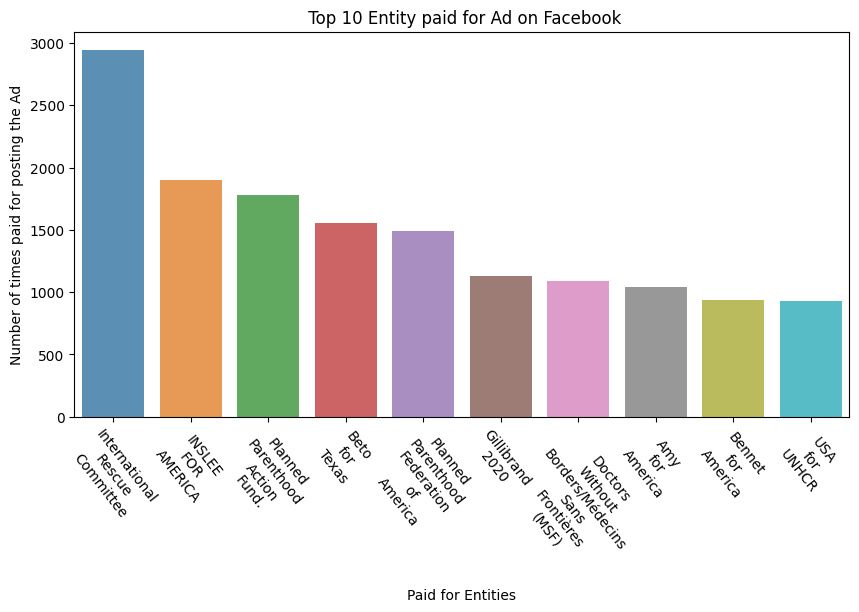

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=paidfor.index.str.replace(' ', '\n'),y=paidfor.values,alpha=0.8)
plt.title(' Top 10 Entity paid for Ad on Facebook')
plt.ylabel('Number of times paid for posting the Ad', fontsize=10)
plt.xlabel('Paid for Entities', fontsize=10)
plt.xticks(rotation=308)
plt.show()

Top 10 advertisers on facebook

In [ ]:
advertisers = dfsubset['advertiser'].value_counts().head(10)
advertisers

Beto O'Rourke                     2064
ACLU                              1577
International Rescue Committee    1476
Donald J. Trump                   1443
Planned Parenthood Action         1230
Sierra Club                       1171
Planned Parenthood                1080
Penzeys Spices                    1026
Care2                             1019
Cathy Myers                       1012
Name: advertiser, dtype: int64

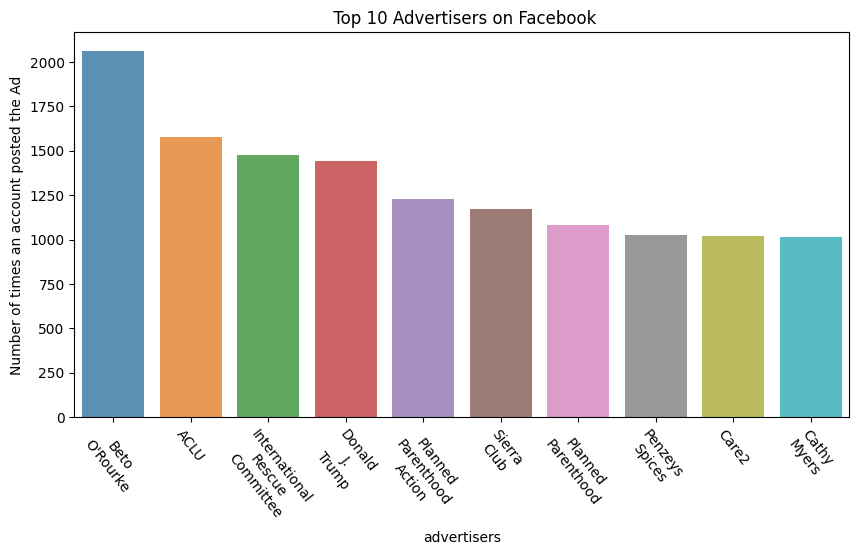

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(x=advertisers.index.str.replace(' ', '\n'),y=advertisers.values,alpha=0.8)
plt.title(' Top 10 Advertisers on Facebook')
plt.ylabel('Number of times an account posted the Ad', fontsize=10)
plt.xlabel('advertisers', fontsize=10)
plt.xticks(rotation=308)
plt.show()

In [ ]:
dfsubset[['title','political','impressions','page','paid_for_by']].value_counts().head(10)